In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astroquery.gaia import Gaia


In [126]:
query = """
SELECT TOP 100000
source_id, ra, dec, parallax,phot_g_mean_mag
From gaiadr3.gaia_source as g
WHERE 1 = CONTAINS(
    POINT('ICRS' , g.ra,g.dec),
    CIRCLE('ICRS' , 81.28,-69.78,20))
AND g.phot_g_mean_mag<20.5
AND g.phot_g_mean_mag>12
AND g.parallax IS NOT NULL

"""

In [127]:
job = Gaia.launch_job_async(query=query, dump_to_file=True, output_format='csv')

[12.000006 12.000008 12.00002  ... 13.092462 13.092481 13.092488]


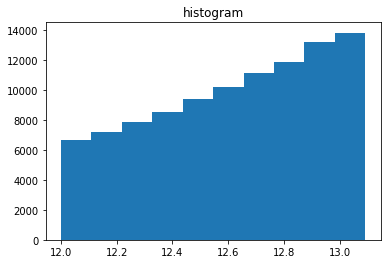

In [129]:
df = job.get_results().to_pandas()
mag = np.array(df['phot_g_mean_mag'])
print(mag)
plt.hist(mag) 
plt.title("histogram") 
plt.show()


In [120]:
##from here SMC 